# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
network1 = pd.read_csv("../data/network1.csv", comment='#', header= None)
network1.columns = ['FromNodeId','ToNodeId']
network1.head()

,FromNodeId,ToNodeId
0,0,11932
1,1,5128
2,2,7008
3,3,10476
4,4,9671


In [28]:
import networkx as nx

#create graph as preferred data structure
G = nx.Graph()
G = nx.from_pandas_edgelist(network1, 'FromNodeId', 'ToNodeId')

In [29]:
print(G.number_of_nodes())

13033


In [30]:
print(G.number_of_edges())

18584


In [76]:
import powerlaw
degree_sequence = sorted((val for (node, val) in G.degree()), reverse=False)
degree_sequence = degrees = sorted((d for n, d in G.degree()), reverse = True)
degreeCount = Counter(degree_sequence)
#deg, cnt = zip(*degreeCount.items())


def display_degree_freq(G):
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots(ncols=1, figsize=(16, 4))
    ax.plot(np.log(deg), np.log(cnt), color='crimson', marker='.', zorder=2)
    ax.plot()
    ax.plot()
    ax.set_ylabel('degree frequency')
    ax.set_xlabel('degree')
    return plt

def plot_powerlaw():
    deg, cnt = zip(*degreeCount.items())
    results=powerlaw.Fit(degree_sequence, discrete=True, estimate_discrete=True)

    cnt = np.array(cnt)
    cdf = cnt.cumsum() / cnt.sum()
    ccdf = 1- cdf

    fig, ax1 = plt.subplots()

    fig = results.plot_ccdf( label='data')
    #results.power_law.plot_ccdf( ax=fig, label='power-law fit')
    fig = results.ccdf(original_data=True)

    ax2 = ax1.twinx()
    ax2.plot(deg, ccdf)
    plt.ylabel('ccdf')
    plt.xlabel('Vulnerabilities')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    
    fig.legend()
    return plt

def results(res):
    for param in res:
        print(param)

<module 'matplotlib.pyplot' from 'c:\\Users\\ann-k\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

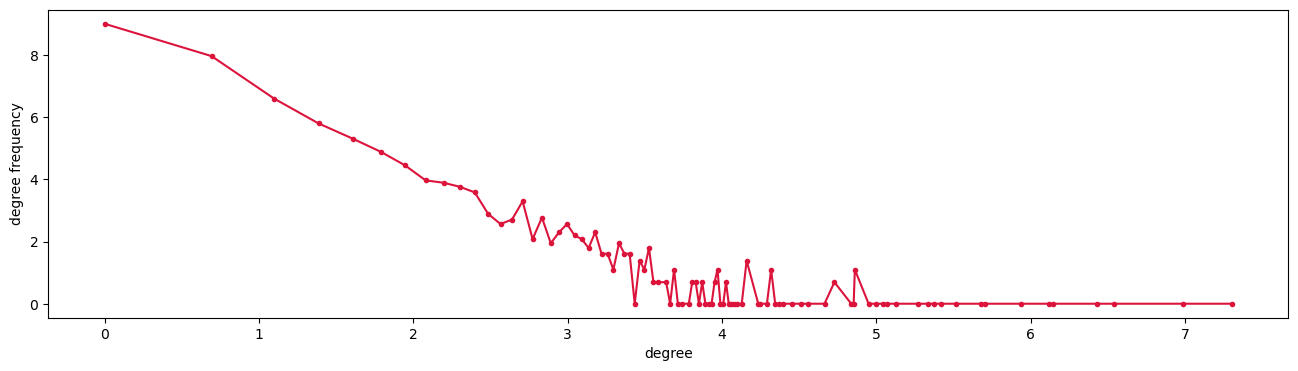

In [77]:
display_degree_freq(G)

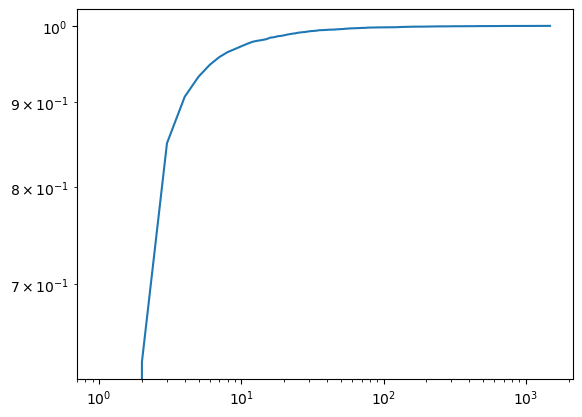

In [78]:
deg, cnt = zip(*degreeCount.items())
cnt = np.array(cnt)
cdf = cnt.cumsum() / cnt.sum()
ccdf = 1- cdf

plt.plot(deg, ccdf, label='ccdf')
#plt.plot(deg, cdf)
plt.xscale('log')
plt.yscale('log')

Calculating best minimal value for power law fit


AttributeError: 'tuple' object has no attribute 'legend'

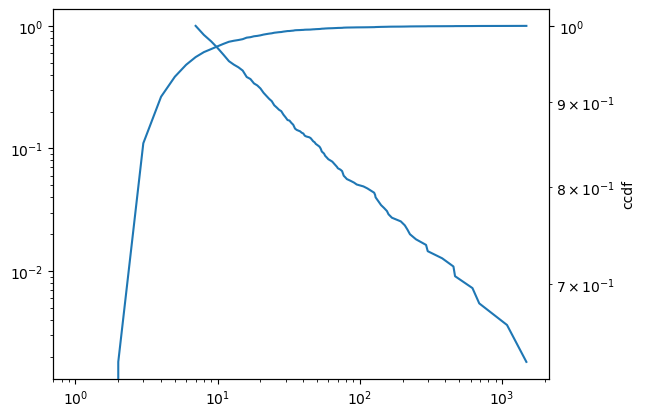

In [79]:
plot_powerlaw()

In [45]:
import powerlaw

results=powerlaw.Fit(degree_sequence, discrete=True, estimate_discrete=False)
print('alpha = ',results.power_law.alpha)
print(results.truncated_power_law.alpha)
print('xmin = ',results.power_law.xmin)
print('xmax = ',results.power_law.xmax)
print('sigma = ',results.power_law.sigma)
print('D = ',results.power_law.D)
print(results.truncated_power_law.xmin)
print('xmax = ', results.truncated_power_law.xmax)
print(results.power_law.discrete)
print('lognormal mu: ',results.lognormal.mu)
print('lognormal sigma: ',results.lognormal.sigma)

Calculating best minimal value for power law fit
alpha =  2.1452776399099993
2.1329538527364127
xmin =  6.0
xmax =  None
sigma =  0.043822830991082036
D =  0.02128349570646132
6.0
xmax =  None
True
lognormal mu:  -781.3486170292344
lognormal sigma:  26.20602720160965


#### Exercise 2.2:  Node degree distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.15441729342048693 0.9999999999999998 2736.065241140872


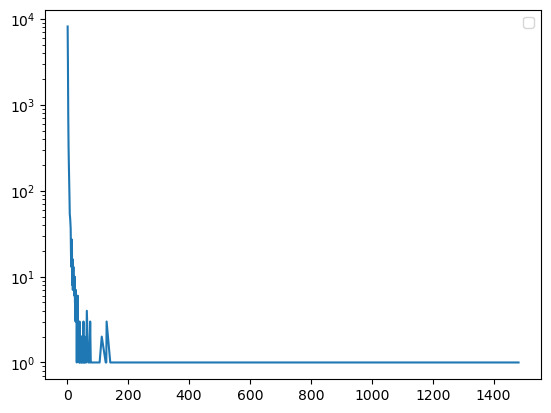

In [5]:
import matplotlib.pyplot as plt
import collections
from scipy.stats import powerlaw as pw
import numpy as np


# create sorted list of node degrees
degrees = sorted((d for n, d in G.degree()), reverse = True)

# count frequency of node degrees
degreeCount = collections.Counter(degrees)

#cdf = np.cumsum(degreeCount.values) / np.sum(degreeCount.values)
#ccdf = 1 - cdf

#fit powerlaw distribution
shape, loc, scale = pw.fit(degrees) # shape_arg, loc, scale
# loc = inital guess of distributions locality parametere , same for scale

print(shape, loc, scale)
#plt.plot(degreeCount.keys, ccdf, label='ccdf')
#fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
# plot degree distribution
#plt.plot(degreeCount.keys(), degreeCount.values())
plt.plot(*zip(*sorted(degreeCount.items())))

#plt.xscale('log')
plt.yscale('log')


#rv = powerlaw(a)

#ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')



plt.legend()

plt.show()
plt.show()

# normalize data
#https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python
#cumsum
#plot inverse
#R, p = results.distribution_compare('power_law', 'lognormal')

In [16]:
from scipy.stats import powerlaw
import numpy as np



fit = powerlaw.fit(degrees)
print(fit)

(0.15441729342048693, 0.9999999999999998, 2736.065241140872)


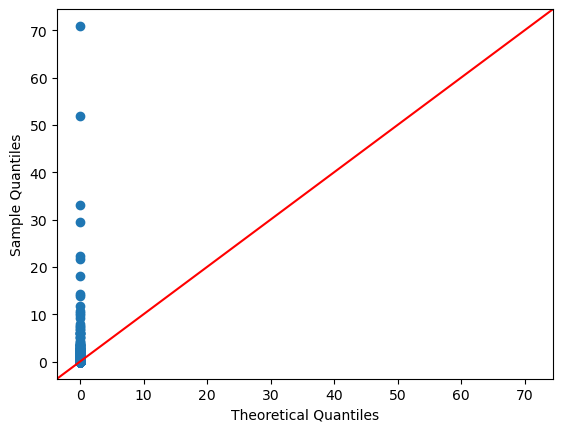

In [23]:
import statsmodels.api as sm
import pylab as py
import numpy as np
from sklearn import preprocessing

mean = np.average(degrees)
std = np.std(degrees)

degrees_norm = preprocessing.normalize([degrees,])

#sm.qqplot(np.array(degrees), fit = True, line="45")
sm.qqplot(np.array(degrees_norm),fit=True, line="45")
py.show()
# loc is mean, scale is std

In [25]:
import statsmodels as sm
sm.stats.diagnostic.lilliefors(degrees, dist='exp')

(0.34616542202509537, 0.0009999999999998899)

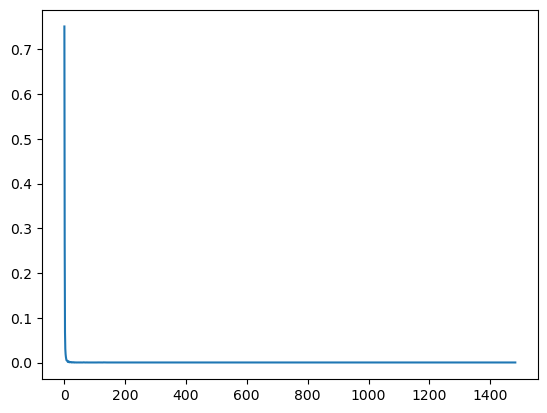

In [45]:
# count frequency of node degrees
degreeCount_2 = collections.Counter(degrees)
sum_degrees = sum(degreeCount_2, 0.0)
degree_count_normalized = {}
for d in degreeCount_2:
    degree_count_normalized[d] = degreeCount_2[d] / sum_degrees
plt.plot(degree_count_normalized.keys(), degree_count_normalized.values())


In [27]:
mean_degree = sum(degrees) / len(degrees)
print(mean_degree)

2.8518376429064682


#### Exercise 2.3: Giant component

In [28]:
# number of connected components in network1
num_connec_comp = nx.number_connected_components(G) 
print("The number of connected components is {}".format(num_connec_comp))
# find biggest component
biggest_component = max(nx.connected_components(G), key=len)
# determine the fraction of the network the biggest component includes
fraction = len(biggest_component) / G.number_of_nodes()
print("The fraction is {:%}".format(fraction))
components = sorted(nx.connected_components(G), key=len, reverse=True)

print("The biggest component is of size {} while the second biggest is of size {}".format(len(components[0]) ,len(components[1]) )) # 2 # stimmt so noch nicht


#Theorem:
#▪ If 𝑐 > 1, then 𝐺(𝑛, 𝑝) has a single component of size 𝜃(𝑛)
#asymptotically almost surely; all other components are
#small (of size 𝑜(𝑛))
print("The average degree is {}".format(mean_degree))

The number of connected components is 192
The fraction is 96.493516%
The biggest component is of size 12576 while the second biggest is of size 16
The average degree is 2.8518376429064682


#### Exercise 2.4: Short paths & Small-worlds

In [10]:
# What is the distribution of path lengths between any two nodes in the network?

#How fast is the network growing? I.e. what is the average number of nodes reachable
#within a distance r (in number of hops) of any other node in the network?

shortest_path_lengths = nx.shortest_path_length(G)
shortest_path_distr = []
for (node, dict) in shortest_path_lengths:
    # the dict contains the target node and the length of the path
    # to this node
    shortest_path_distr.extend(dict.values())

plt.hist(shortest_path_distr)

KeyboardInterrupt: 

#### Exercise 2.5: Network comparison

In [29]:
# all again for network2
network2 = pd.read_csv("../data/network2.csv", comment='#', header= None)
network2.columns = ['FromNodeId','ToNodeId']
network2.head()

,FromNodeId,ToNodeId
0,135627,135630
1,135627,135623
2,135627,135625
3,135627,135626
4,137038,137040


In [30]:
#create graph as preferred data structure
G2 = nx.Graph()
G2 = nx.from_pandas_edgelist(network2, 'FromNodeId', 'ToNodeId')

print(G2.number_of_nodes())
print(G2.number_of_edges())

26542
43516


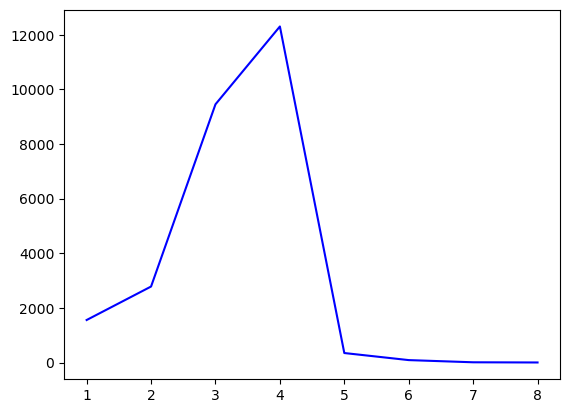

In [33]:
# create sorted list of node degrees
degrees_2 = sorted((d for n, d in G2.degree()), reverse = True)

# count frequency of node degrees
degreeCount_2 = collections.Counter(degrees_2)

# plot degree distribution
plt.plot(degreeCount_2.keys(), degreeCount_2.values(), color='blue')

plt.show()

In [32]:
mean_degree_2 = sum(degrees_2) / len(degrees_2)
print(mean_degree_2)

3.2790294627383014


In [16]:
# number of connected components in network1
num_connec_comp_2 = nx.number_connected_components(G2)
print("The number of connected components is {}".format(num_connec_comp_2))
# find biggest component
biggest_component_2 = max(nx.connected_components(G2), key=len)
# determine the fraction of the network the biggest component includes
fraction_2 = len(biggest_component_2) / G2.number_of_nodes()
print("The fraction is {:%}".format(fraction_2))
components_2 = sorted(nx.connected_components(G2), key=len, reverse=True)

print("The biggest component is of size {} while the second biggest is of size {}".format(len(components_2[0]) ,len(components_2[1]) )) 


#Theorem:
#▪ If 𝑐 > 1, then 𝐺(𝑛, 𝑝) has a single component of size 𝜃(𝑛)
#asymptotically almost surely; all other components are
#small (of size 𝑜(𝑛))
print("The average degree is {}".format(mean_degree_2))

The number of connected components is 5
The fraction is 99.770176%
The biggest component is of size 26481 while the second biggest is of size 30
The average degree is 3.2790294627383014


The second network has a much smaller number of connected components (5 < 192), while its biggest component covers a bigger fraction of all the nodes in the network (99.77% > 96.49%). Additionally, the second network has a higher average node degree (3.28 > 2.85).

#### Exercise 2.6: Network identification

The second network represents the network of roads in the city of New York. This can be concluded based on the fact, that the number of components is likely very small since a road network should be overall very well connected instead of having a higher number of components. If two components are not connected it would mean that you cannot traverse between them, which should be less common in a road network. 

The first network represents routers comprising the Internet. 